{'color-0': 8.618375629166996, 'color-1': 16.59967191082299, 'color-2': 22.31760498194851, 'color-3': 24.98755748148734, 'color-4': 27.47678999657417}


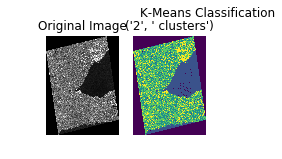

done2


In [8]:
import gdal, gdalconst
from scipy.cluster.vq import *
import matplotlib.pyplot as plt
import scipy.misc
from collections import Counter
from numpy import random

def save_image(array, name):
    fig = plt.figure()
    plt.imsave(name, array.astype('uint8'))
    plt.close(fig)

sample_data_file_name = 'data/RS1_m0700838_S5_20000804_231509_HH_SGF.tif'
    
sarfile = gdal.Open(sample_data_file_name, gdalconst.GA_ReadOnly)
sarraster = sarfile.GetRasterBand(1).ReadAsArray()

# Flatten image to get line of values
flatsarraster = sarraster.flatten()

# Create figure to receive results
fig = plt.figure()
fig.suptitle('K-Means Classification')

# In first subplot add original SAR image
ax = plt.subplot(241)
plt.axis('off')
ax.set_title('Original Image')
ax.set_aspect(10)
plt.imshow(sarraster, cmap = 'gray',aspect='auto')

#This scipy code classifies k-mean, code has same length as flattened
#SAR raster and defines which class the SAR value corresponds to
random.seed((1000,2000))
centroids, variance = kmeans(flatsarraster.astype(float), 5)
code, distance = vq(flatsarraster, centroids)

k = list(Counter(code).keys())
v = sorted(list(Counter(code).values()))

percentage = {}
for idx, val in enumerate(v):
    percentage[f'color-{idx}'] = float(val/len(code))*100
print(percentage)

#Since code contains the classified values, reshape into SAR dimensions
codeim = code.reshape(sarraster.shape)

#Plot the subplot with (i+2)th k-means
ax = plt.subplot(2,4, 2)
plt.axis('off')
xlabel = str(2) , ' clusters'

ax.set_title(xlabel)
plt.imshow(codeim,  interpolation='nearest', aspect='auto')
save_image(codeim, f'{sample_data_file_name}-out.jpg')
    
plt.show()
print('done2')